In [1]:
# 225150207111001_1 MUHAMMAD NADHIF_1
# 225150201111002_2 NALENDRA MARCHELO_2
# 225150200111005_3 NARENDRA ATHA ABHINAYA_3
 # 225150200111003_4 YOSUA SAMUEL EDLYN SINAGA_4

## Impor Library yang Dibutuhkan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set_style('whitegrid')

## Memuat dan Memeriksa Data

In [3]:
# Muat dataset
file_path = 'data/Heart_Disease_Prediction.csv'
df = pd.read_csv(file_path)

df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})

print("5 Baris Pertama Data (setelah mapping):")
display(df.head())

print("\nInformasi Dataset (setelah mapping):")
df.info()

5 Baris Pertama Data (setelah mapping):


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,52,1,1,125,212,0,1,168,0,1.0,2,2,3,NaN
1,53,1,1,140,203,1,0,155,1,3.1,0,0,3,NaN
2,70,1,1,145,174,0,1,125,1,2.6,0,0,3,NaN
3,61,1,1,148,203,0,1,161,0,0.0,2,1,3,NaN
4,62,0,1,138,294,1,1,106,0,1.9,1,3,2,NaN



Informasi Dataset (setelah mapping):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2809 entries, 0 to 2808
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      2809 non-null   int64  
 1   Sex                      2809 non-null   int64  
 2   Chest pain type          2809 non-null   int64  
 3   BP                       2809 non-null   int64  
 4   Cholesterol              2809 non-null   int64  
 5   FBS over 120             2809 non-null   int64  
 6   EKG results              2809 non-null   int64  
 7   Max HR                   2809 non-null   int64  
 8   Exercise angina          2809 non-null   int64  
 9   ST depression            2809 non-null   float64
 10  Slope of ST              2809 non-null   int64  
 11  Number of vessels fluro  2809 non-null   int64  
 12  Thallium                 2809 non-null   int64  
 13  Heart Disease            1784 non-null  

## Exploratory Data Analysis (EDA)


Statistik Deskriptif:


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,1784.000000
mean,55.374155,0.742969,1.976860,136.575650,247.396226,0.114276,0.358135,154.590602,0.495550,1.183019,1.365967,0.595230,2.494482,0.763453
std,9.896828,0.437074,1.090541,21.226564,62.619339,0.318202,0.500611,25.278415,0.500069,1.224146,0.584031,0.943333,0.590211,0.425081
min,26.000000,0.000000,1.000000,90.000000,92.000000,0.000000,0.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,1.000000,124.000000,206.000000,0.000000,0.000000,140.000000,0.000000,0.200000,1.000000,0.000000,2.000000,1.000000
50%,56.000000,1.000000,1.000000,132.000000,241.000000,0.000000,0.000000,157.000000,0.000000,0.900000,1.000000,0.000000,3.000000,1.000000
75%,63.000000,1.000000,3.000000,143.000000,281.000000,0.000000,1.000000,173.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,80.000000,1.000000,5.000000,221.000000,713.000000,1.000000,3.000000,213.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000



Jumlah Nilai yang Hilang per Kolom:
Age                           0
Sex                           0
Chest pain type               0
BP                            0
Cholesterol                   0
FBS over 120                  0
EKG results                   0
Max HR                        0
Exercise angina               0
ST depression                 0
Slope of ST                   0
Number of vessels fluro       0
Thallium                      0
Heart Disease              1025
dtype: int64


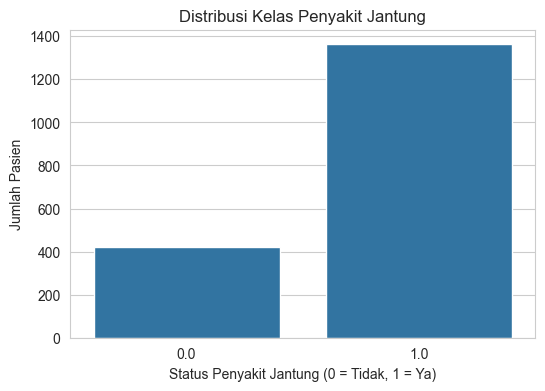

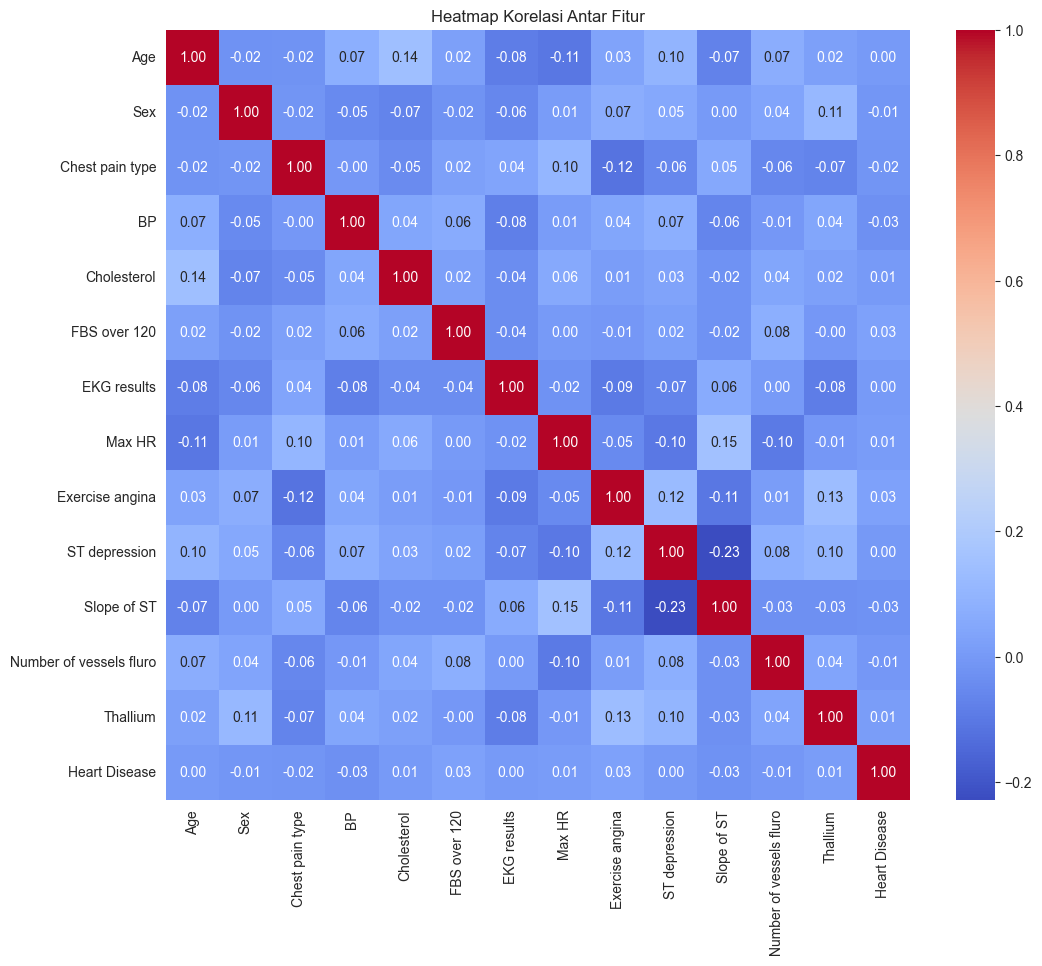

In [4]:
TARGET_COLUMN = 'Heart Disease'

print("\nStatistik Deskriptif:")
display(df.describe())

print("\nJumlah Nilai yang Hilang per Kolom:")
print(df.isnull().sum())

plt.figure(figsize=(6, 4))
sns.countplot(x=TARGET_COLUMN, data=df)
plt.title('Distribusi Kelas Penyakit Jantung')
plt.xlabel('Status Penyakit Jantung (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah Pasien')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

## Preprocessing dan Persiapan Data

In [5]:
# ## Sel Preprocessing dan Persiapan Data (Versi Robust Final)

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

# Diasumsikan 'df' adalah DataFrame mentah yang sudah dimuat
TARGET_COLUMN = 'Heart Disease'

# --- 1. Pembersihan Data Mentah ---
# Hapus semua baris di mana label targetnya kosong. Ini langkah pertama dan terpenting.
df.dropna(subset=[TARGET_COLUMN], inplace=True)
print(f"1. Baris dengan target kosong dihapus. Baris tersisa: {len(df)}")

# --- 2. Pisahkan Fitur dan Target yang Sudah Bersih ---
X = df.drop(TARGET_COLUMN, axis=1)
y = df[TARGET_COLUMN]
print("2. Fitur (X) dan Target (y) telah dipisahkan.")

# --- 3. Preprocessing pada Fitur (X) ---
# Identifikasi tipe-tipe kolom
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist() # (Jika ada di masa depan)

# Isi nilai kosong yang MUNGKIN masih ada di kolom FITUR
imputer_num = SimpleImputer(strategy='median')
X[numerical_cols] = imputer_num.fit_transform(X[numerical_cols])
print("3. Missing values pada fitur telah diisi (jika ada).")

# Standarisasi semua fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_preprocessed = pd.DataFrame(X_scaled, columns=X.columns)
print("4. Semua fitur telah distandarisasi.")

# --- 4. Persiapan Akhir untuk Model ---
# Bagi data yang SUDAH BERSIH DAN DIPROSES menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)
print(f"\n✅ Data siap. Bentuk X_train: {X_train.shape}")

1. Baris dengan target kosong dihapus. Baris tersisa: 1784
2. Fitur (X) dan Target (y) telah dipisahkan.
3. Missing values pada fitur telah diisi (jika ada).
4. Semua fitur telah distandarisasi.

✅ Data siap. Bentuk X_train: (1427, 13)


## Melatih Model Machine Learning (update integrasi MLFlow)

In [ ]:
# ## Melatih Model Machine Learning (dengan Logging Parameter Lengkap)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import mlflow
import mlflow.sklearn
from mlflow.models import infer_signature

# Hubungkan ke server MLflow jika berjalan
# mlflow.set_tracking_uri("http://localhost:5000")

# Atur nama eksperimen
mlflow.set_experiment("Prediksi Penyakit Jantung v1")

# Mulai sesi pencatatan MLflow
with mlflow.start_run(run_name="RandomForest_Full_Params"):
    
    # --- PERUBAHAN DI SINI ---
    # 1. Inisialisasi model terlebih dahulu dengan parameter yang Anda inginkan
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # 2. Ambil SEMUA parameter dari model dan log ke MLflow
    # Metode .get_params() akan mengambil 'n_estimators', 'random_state', 
    # dan semua parameter default lainnya (seperti max_depth, min_samples_leaf, dll.)
    mlflow.log_params(model.get_params())
    
    # --- Lanjutan Kode (Tetap Sama) ---
    # Latih Model
    print("Memulai proses training model...")
    model.fit(X_train, y_train)
    print("Model berhasil dilatih!")
    
    # Buat signature dari data latih
    y_pred_train = model.predict(X_train)
    signature = infer_signature(X_train, y_pred_train)
    
    # Evaluasi pada data uji
    y_pred_test = model.predict(X_test)
    
    # Kumpulkan dan log metrik
    metrics = {
        "accuracy": accuracy_score(y_test, y_pred_test),
        "recall": recall_score(y_test, y_pred_test),
        "precision": precision_score(y_test, y_pred_test),
        "f1_score": f1_score(y_test, y_pred_test)
    }
    mlflow.log_metrics(metrics)
    
    # Log model beserta signature-nya
    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="model",
        signature=signature
    )
    
    print("\n✅ Eksperimen dengan parameter lengkap telah berhasil dicatat.")

2025/07/16 22:41:09 INFO mlflow.tracking.fluent: Experiment with name 'Prediksi Penyakit Jantung v1 - Simple Model' does not exist. Creating a new experiment.



Memulai proses training model...


2025/07/16 22:41:10 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Model berhasil dilatih!


2025/07/16 22:41:17 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\NALEND~1\AppData\Local\Temp\tmpg624le4c\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.6.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 



✅ Eksperimen dengan model RandomForest berhasil dicatat.


## Evaluasi Model

Akurasi Model: 0.7591

Laporan Klasifikasi:
              precision    recall  f1-score   support

         0.0       0.25      0.01      0.02        84
         1.0       0.76      0.99      0.86       273

    accuracy                           0.76       357
   macro avg       0.51      0.50      0.44       357
weighted avg       0.64      0.76      0.66       357


Confusion Matrix:


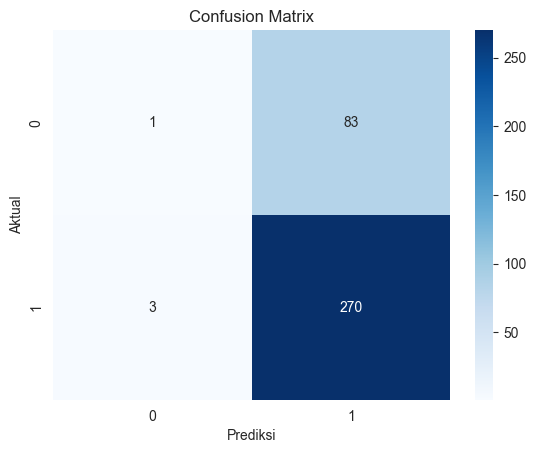

In [7]:
y_pred = model.predict(X_test)

# akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.4f}")

# presisi, recall, f1-score
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

##  Menyimpan Model yang Telah Dilatih

In [8]:
model_dir = 'model'
model_path = os.path.join(model_dir, 'random_forest_heart_disease.joblib')

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

joblib.dump(model, model_path)

print(f"Model telah berhasil disimpan di: {model_path}")

Model telah berhasil disimpan di: model\random_forest_heart_disease.joblib


# Membuat Data Sintetis dan Simulasi Drift